# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']
import pandas as pd

### Now take a look at the shapes of the X and y matricies 

In [2]:
print(X.shape, y.shape)

(70000, 784) (70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [3]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

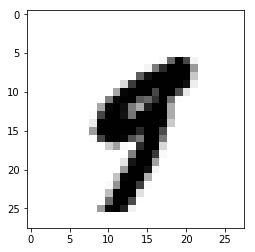

In [5]:
cmap=mpl.cm.binary
plt.imshow(X[36000].reshape(28,28), cmap=cmap, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [6]:
y[36000]

'9'

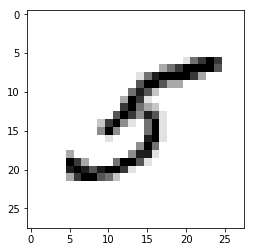

In [7]:
cmap=mpl.cm.binary
plt.imshow(X[35].reshape(28,28), cmap=cmap, interpolation="nearest")

In [8]:
y[35]

'5'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [10]:
#We understand that we have to convert to 0 all target numbers that are not a 5. np.where might work here.
y5 = np.where(y == "5", "1", "0")

In [11]:
y5_train, y5_test = y5[:60000], y5[60000:]

In [12]:
y5

array(['1', '0', '0', ..., '0', '1', '0'], dtype='<U1')

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression().fit(X_train, y5_train)

/home/salva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Does the classifier predict correctly the 36000th digit we picked before?

In [15]:
y5_pred = model.predict(X)

print(y5_pred[36000])
                          

0


In [16]:
#35 row is a known 5.

y5_pred = model.predict(X)

print(y5_pred[35])

1


### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [17]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [32]:
never_5_clf.fit(X_train, y5_train)
y_predict = never_5_clf.predict(X_test)

In [33]:
temp = y_predict[:,0]
y_predict2 = np.where(temp == False, "0", "5")

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

Accuracy: 0.9775
F1 score: 0.869109947643979
Recall: 0.8374439461883408
Precision: 0.9032648125755743

 confussion matrix:
 [[9028   80]
 [ 145  747]]


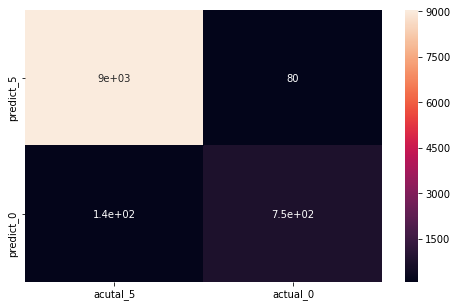

In [35]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# The logistic regression confusion matrix, precision and others.

print ('Accuracy:', accuracy_score(y5_test, y5_pred))
print ('F1 score:', f1_score(y5_test, y5_pred, average="binary", pos_label= "1"))
print ('Recall:', recall_score(y5_test, y5_pred, average="binary", pos_label= "1"))
print ('Precision:', precision_score(y5_test, y5_pred, average="binary", pos_label= "1"))
print ('\n confussion matrix:\n',confusion_matrix(y5_test, y5_pred))

df_cm = pd.DataFrame(confusion_matrix(y5_test, y5_pred), index = ["predict_5", "predict_0"],
                  columns = ["acutal_5", "actual_0"])
plt.figure(figsize = (8,5))
sns.heatmap(df_cm, annot=True)
plt.show()

Accuracy: 0.9108
F1 score: 0.0
Recall: 0.0
Precision: 0.0

 confussion matrix:
 [[9108    0]
 [ 892    0]]


/home/salva/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/salva/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


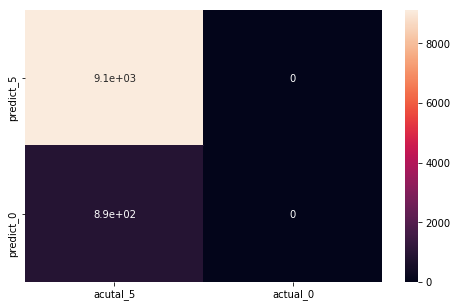

In [37]:
# Never5 classifier Metrics and Scores calculation

print ('Accuracy:', accuracy_score(y5_test, y_predict2))
print ('F1 score:', f1_score(y5_test, y_predict2, average="binary", pos_label= "1"))
print ('Recall:', recall_score(y5_test, y_predict2, average="binary", pos_label= "1"))
print ('Precision:', precision_score(y5_test, y_predict2, average="binary", pos_label= "1"))
print ('\n confussion matrix:\n',confusion_matrix(y5_test, y_predict2))

df_cm = pd.DataFrame(confusion_matrix(y5_test, y_predict2), index = ["predict_5", "predict_0"],
                  columns = ["acutal_5", "actual_0"])
plt.figure(figsize = (8,5))
sns.heatmap(df_cm, annot=True)
plt.show()

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

What we can see from the confusion matrix below, is that even if "Never5 model" always predicts a 0, since our objective was to say if it was a 5 or not, then there are much more probabilities to not predict a 5 than predicting it. Therefore, the accuracy is quite high in this case.

This is why we cannot only take a look at the accuracy, and that we should take a look at all the scores. We can see from the other scores that in the logistic regression the model performs quite well according to all the scores. However, in the never5 classifiers, the precision, recall and f1 scores are 0.

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

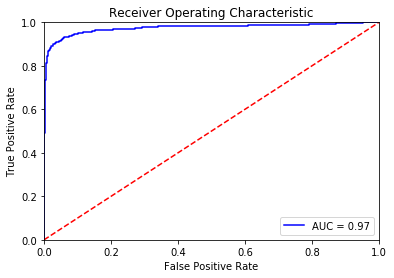

In [41]:
from sklearn import metrics
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y5_test, preds, pos_label="1")
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



never 5 function

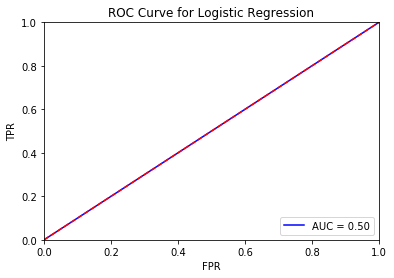

In [44]:
# Plotting the ROC_AUC Curve for Never5 Classifier
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y5_test, never_y5_pred, pos_label="1")
roc_auc = metrics.auc(fpr, tpr)
# Creating the ROC_CURVE for Logistic Regression
import matplotlib.pyplot as plt
plt.title('ROC Curve for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

### Now find the roc_auc_score for each. 

In [46]:
from sklearn.metrics import roc_auc_score

# Calculating the ROC_AUC_Score for the Logistic regression model
print(f"ROC_AUC_Score Logistic Regression:{roc_auc_score(y5_test, preds)}")

# Calculating the ROC_AUC_Score for the Never 5 classifier model
print(f"ROC_AUC_Score Never5 Classifier: {roc_auc_score(y5_test, never_y5_pred)}")

ROC_AUC_Score Logistic Regression:0.9747420589202614
ROC_AUC_Score Never5 Classifier: 0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

This metric measures the total area under the curve. In the Logistic regression the AUC Score is 0.9. That means that this model does a quite good job of distinguishing the positive and negative values. Therefore, the AUC score is 0.9747 as the area under the ROC curve is large.

On the other hand, the second metric tells us that the the model is performing poorly and it is predictions are almost random, as it happens in this never5_classifier, since it is predicting always 0. We can see both on the graph and also on the score that it is equal to 0.5, which means that the model performs poorly and the outcome is mainly random.